In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
a = 0.1
b = 0.02
c = 0.1
e = 0.02

init_condition = [c/e, a/b]
init_condition_2 = [c/e+0.1, a/b + 0.1]
init_condition_3 = [c/e+2, a/b + 1]

t = np.linspace(0, 500, 1000)

In [157]:
def dpredator_dt(predator, prey):
    return -c * predator + e * predator * prey

In [158]:
def dprey_dt(predator, prey):
    return a * prey - b * predator * prey

In [159]:
def runge_kutta4(f, y0):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = f(y[i, 0], y[i, 1])*h
        k2 = f(y[i, 0] + k1/2, y[i, 1] + k1/2)*h
        k3 = f(y[i, 0] + k2/2, y[i, 1] + k2/2)*h
        k4 = f(y[i, 0] + k3, y[i, 1] + k3)*h
        y[i+1] = y[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [160]:
def runge_kutta4_predator(y0):
    return runge_kutta4(dpredator_dt, y0)

In [161]:
def runge_kutta4_prey(y0):
    return runge_kutta4(dprey_dt, y0)

In [162]:
predator = runge_kutta4_predator(init_condition)
prey = runge_kutta4_prey(init_condition)
predator_2 = runge_kutta4_predator(init_condition_2)
prey_2 = runge_kutta4_prey(init_condition_2)
predator_3 = runge_kutta4_predator(init_condition_3)
prey_3 = runge_kutta4_prey(init_condition_3)

C:\Users\brusi\AppData\Local\Temp\ipykernel_22668\1552802943.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return -c * predator + e * predator * prey
C:\Users\brusi\AppData\Local\Temp\ipykernel_22668\1552802943.py:2: RuntimeWarning: invalid value encountered in scalar add
  return -c * predator + e * predator * prey


In [166]:
predator_2

array([[5.1       , 5.1       ],
       [5.1052404 , 5.1052404 ],
       [5.11076138, 5.11076138],
       ...,
       [       nan,        nan],
       [       nan,        nan],
       [       nan,        nan]])

In [164]:
prey_3

array([[7.        , 6.        ],
       [6.88451918, 5.88451918],
       [6.77768184, 5.77768184],
       ...,
       [5.        , 4.        ],
       [5.        , 4.        ],
       [5.        , 4.        ]])

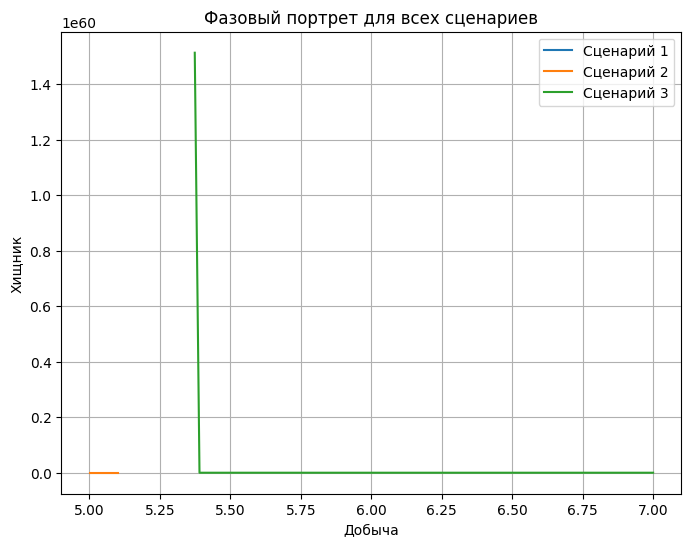

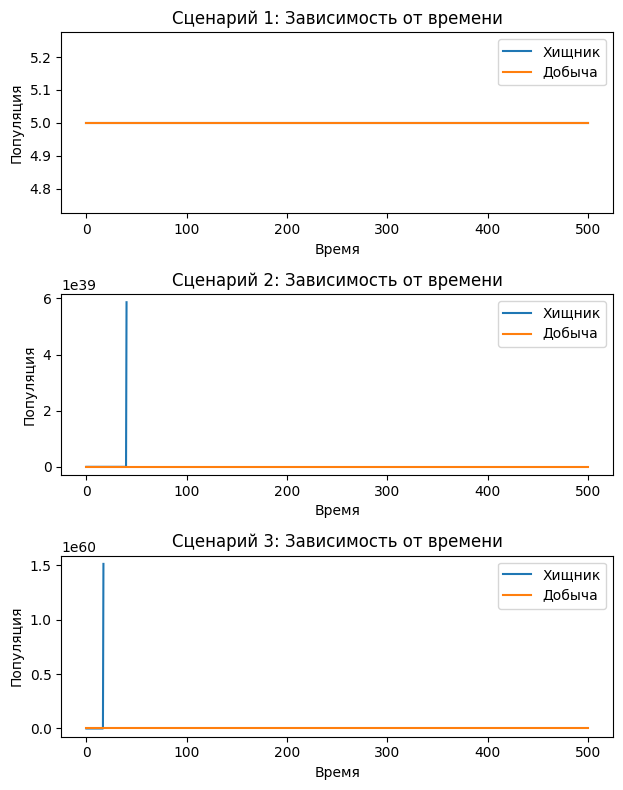

In [165]:
# Построение фазового портрета для всех трех ситуаций
plt.figure(figsize=(8, 6))

# Ситуация 1
plt.plot(prey[:,0], predator[:,0], label='Сценарий 1') 

# Ситуация 2
plt.plot(prey_2[:,0], predator_2[:,0], label='Сценарий 2')

# Ситуация 3
plt.plot(prey_3[:,0], predator_3[:,0], label='Сценарий 3')

plt.xlabel('Добыча')
plt.ylabel('Хищник')
plt.title('Фазовый портрет для всех сценариев')
plt.legend()
plt.grid()
plt.show()

# Построение зависимости от времени для каждой пары значений
plt.figure(figsize=(12, 8))

# Ситуация 1
plt.subplot(3, 2, 1)
plt.plot(t, predator[:,0], label='Хищник')
plt.plot(t, prey[:,0], label='Добыча')
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.title('Сценарий 1: Зависимость от времени')
plt.legend()

# Ситуация 2
plt.subplot(3, 2, 3)
plt.plot(t, predator_2[:,0], label='Хищник')
plt.plot(t, prey_2[:,0], label='Добыча')
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.title('Сценарий 2: Зависимость от времени')
plt.legend()

# Ситуация 3
plt.subplot(3, 2, 5)
plt.plot(t, predator_3[:,0], label='Хищник')
plt.plot(t, prey_3[:,0], label='Добыча')
plt.xlabel('Время')
plt.ylabel('Популяция')
plt.title('Сценарий 3: Зависимость от времени')
plt.legend()

plt.tight_layout()
plt.show()